In [2]:
# Leer la información
import pandas as pd
df =pd.read_csv('Database.csv',sep=';')
print(df)

        ID     Class
0    0.png  Glaucoma
1    1.png  Glaucoma
2    2.png  Glaucoma
3    3.png  Glaucoma
4    4.png  Glaucoma
..     ...       ...
91  91.png   Healthy
92  92.png   Healthy
93  93.png   Healthy
94  94.png   Healthy
95  95.png   Healthy

[96 rows x 2 columns]


In [3]:
import numpy as np
clases, frec =np.unique(df.Class, return_counts=True)
print(clases, frec)

['Glaucoma' 'Healthy'] [59 37]


1
1.png


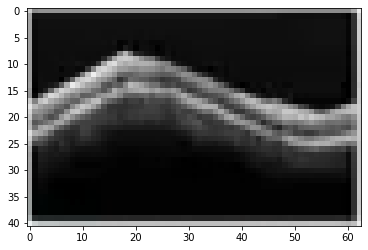

In [12]:
import random
import cv2
import matplotlib.pyplot as plt
num = random.randint(0,len(df))
print(num)
name_img=df.ID[num]
print(name_img)
img = cv2.imread('images/' + name_img)
plt.imshow(img,cmap='gray')
plt.show()

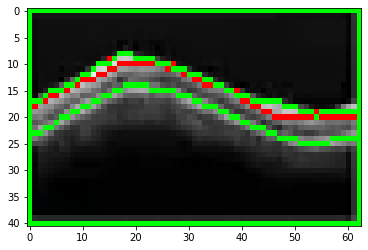

In [23]:
# leemos las máscaras
rnfl_mask = cv2.imread('rnfl/' + name_img,0)
retina_mask = cv2.imread('retinas/' + name_img,0)
t, mask_rnfl = cv2.threshold(rnfl_mask,0,255,cv2.THRESH_OTSU)
t, mask_retina = cv2.threshold(retina_mask,0,255,cv2.THRESH_OTSU)

cont_rnfl, _ =cv2.findContours(mask_rnfl, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont_retina, _= cv2.findContours(mask_retina, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img.copy(), cont_rnfl, -1,(255,0,0),0)
image = cv2.drawContours(image.copy(),cont_retina, -1, (0,255,0),0)
plt.imshow(image, cmap='gray')
plt.show()